<a href="https://colab.research.google.com/github/Nenavath-chandu/energy-analysis/blob/main/coalvssustainability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**India’s Coal Dependency & Renewable Transition Analysis (2010–2024) **
This project analyzes India's monthly coal production and renewable energy capacity from 2010 to 2024. It explores long-term trends, growth rates (CAGR), and proposes policy recommendations for accelerating India's energy transition.

---


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [22]:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv("monthly_coal_vs_renewables_2010_2024.csv", parse_dates=["Date"])
df.head(len(df))


,Date,Coal_Production_MT,Renewable_Capacity_GW
0,2010-01-01,532.48,46.28
1,2010-02-01,535.59,0.00
2,2010-03-01,544.47,0.00
3,2010-04-01,551.47,39.71
4,2010-05-01,542.63,4.62
...,...,...,...
175,2024-08-01,754.00,91.99
176,2024-09-01,747.55,143.03
177,2024-10-01,754.70,131.38
178,2024-11-01,748.73,163.84


In [21]:
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df[["Date", "Year", "Month"]].head(len(df))


,Date,Year,Month
0,2010-01-01,2010,1
1,2010-02-01,2010,2
2,2010-03-01,2010,3
3,2010-04-01,2010,4
4,2010-05-01,2010,5
...,...,...,...
175,2024-08-01,2024,8
176,2024-09-01,2024,9
177,2024-10-01,2024,10
178,2024-11-01,2024,11


 Ploting Monthly Trends

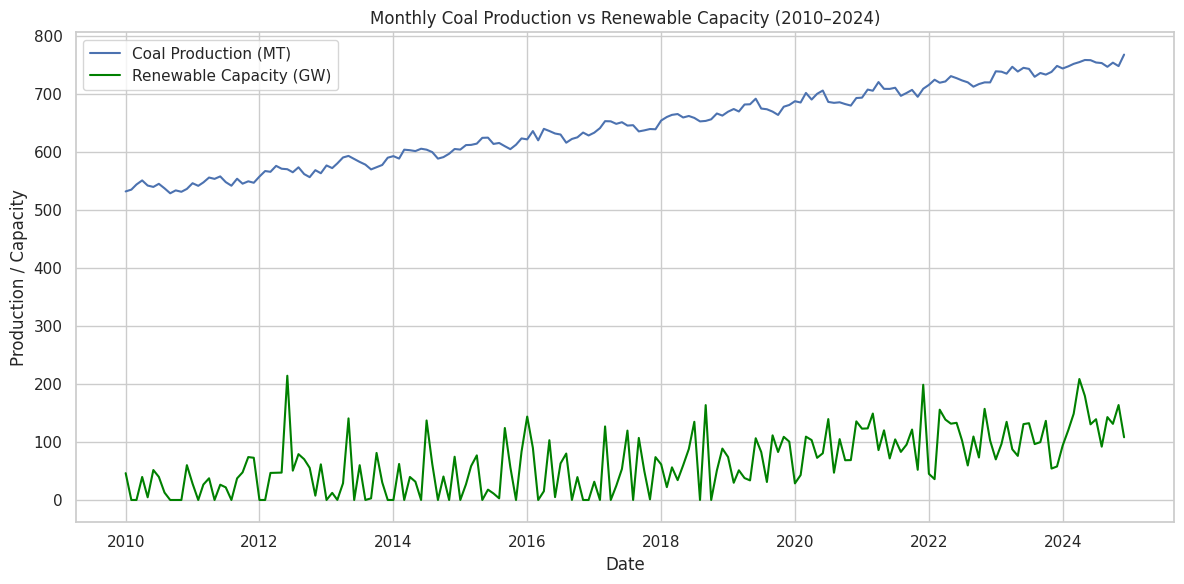

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Coal_Production_MT", label="Coal Production (MT)")
sns.lineplot(data=df, x="Date", y="Renewable_Capacity_GW",color='green',label="Renewable Capacity (GW)")
plt.title("Monthly Coal Production vs Renewable Capacity (2010–2024)")
plt.xlabel("Date")
plt.ylabel("Production / Capacity")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Yearly Aggregation

In [12]:
yearly = df.groupby("Year").agg({
    "Coal_Production_MT": "sum",
    "Renewable_Capacity_GW": "max"
}).reset_index()

yearly


,Year,Coal_Production_MT,Renewable_Capacity_GW
0,2010,6462.56,60.10
1,2011,6594.35,74.05
2,2012,6803.25,214.41
3,2013,6979.94,140.81
4,2014,7187.80,137.22
5,2015,7378.68,124.21
6,2016,7548.56,143.94
7,2017,7730.48,126.91
8,2018,7923.27,163.73
9,2019,8117.85,111.57


 Plot Yearly Summary

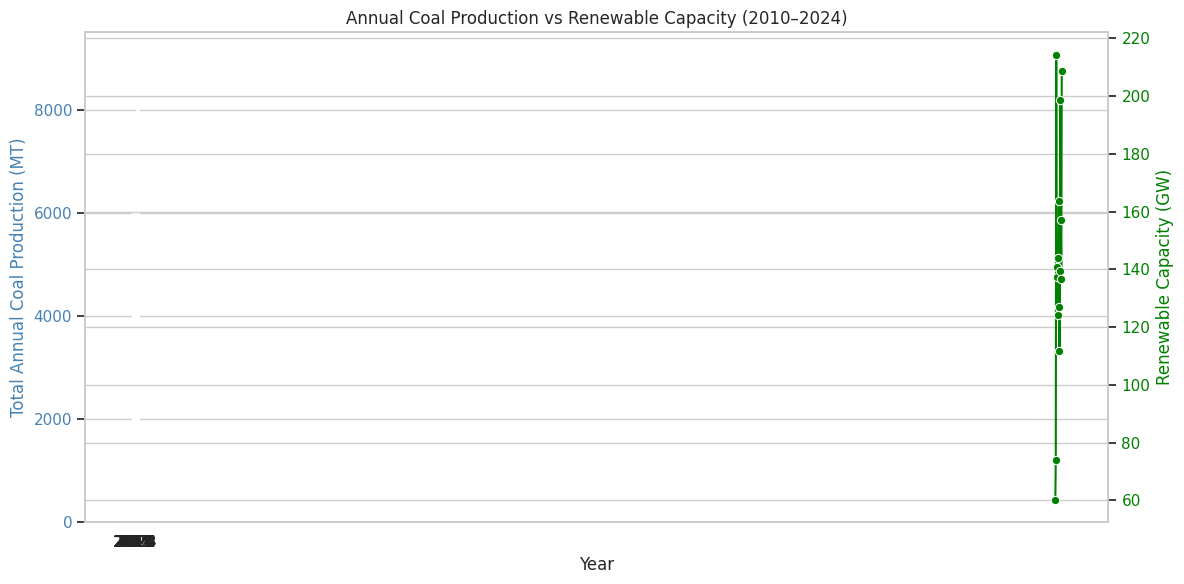

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x="Year", y="Coal_Production_MT", data=yearly, ax=ax1, color="steelblue")
ax1.set_ylabel("Total Annual Coal Production (MT)", color="steelblue")
ax1.set_xlabel("Year")
ax1.tick_params(axis='y', labelcolor="steelblue")

ax2 = ax1.twinx()
sns.lineplot(x="Year", y="Renewable_Capacity_GW", data=yearly, ax=ax2, color="green", marker="o")
ax2.set_ylabel("Renewable Capacity (GW)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Annual Coal Production vs Renewable Capacity (2010–2024)")
plt.grid(True)
plt.tight_layout()
plt.show()


Calculate CAGR(Compound Annual Growth Rate).

In [16]:
def calc_cagr(start_val, end_val, years):
    return ((end_val / start_val) ** (1 / years)) - 1

coal_cagr = calc_cagr(yearly["Coal_Production_MT"].iloc[0],
                      yearly["Coal_Production_MT"].iloc[-1],
                      yearly["Year"].iloc[-1] - yearly["Year"].iloc[0])

renew_cagr = calc_cagr(yearly["Renewable_Capacity_GW"].iloc[0],
                       yearly["Renewable_Capacity_GW"].iloc[-1],
                       yearly["Year"].iloc[-1] - yearly["Year"].iloc[0])

print(f"Coal Production CAGR: {coal_cagr*100:.2f}% per year")
print(f"Renewable Capacity CAGR: {renew_cagr*100:.2f}% per year")


Coal Production CAGR: 2.43% per year
Renewable Capacity CAGR: 9.30% per year


Insights and Policy Recommendations

In [19]:
print("Insights:")
print("- Coal production grew steadily (~2.43% CAGR) with seasonal cycles.")
print("- Renewable capacity increased rapidly (~9.3% CAGR), especially post-2015.")
print("- India is moving toward energy transition, but coal still dominates overall supply.")

print("1. Set up Just Transition Funds in coal-heavy states (Jharkhand, Chhattisgarh, Odisha).")
print("2. Create RE-skilling programs for coal sector workers.")
print("3. Accelerate solar + wind deployment in demand-heavy states.")
print("4. Modernize power grid to absorb renewable energy reliably.")
print("5. Align state-level RE targets with India’s Net Zero goal (2070).")


Insights:
- Coal production grew steadily (~2.43% CAGR) with seasonal cycles.
- Renewable capacity increased rapidly (~9.3% CAGR), especially post-2015.
- India is moving toward energy transition, but coal still dominates overall supply.
1. Set up Just Transition Funds in coal-heavy states (Jharkhand, Chhattisgarh, Odisha).
2. Create RE-skilling programs for coal sector workers.
3. Accelerate solar + wind deployment in demand-heavy states.
4. Modernize power grid to absorb renewable energy reliably.
5. Align state-level RE targets with India’s Net Zero goal (2070).
